<a href="https://colab.research.google.com/github/Bimee-Stack/Advanced-Mathematics-Coursework/blob/main/Advanced_Mathematics_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 01 (a)

In [10]:
import sympy as sp

x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

Tb = a * x**2 + b * y**2
grad_Tb = (sp.diff(Tb, x), sp.diff(Tb, y))
print("Gradient of Tb:", grad_Tb)

Tt = sp.sqrt(c * (x**2 + y**2))
grad_Tt = (sp.diff(Tt, x), sp.diff(Tt, y))
print("Gradient of Tt:", grad_Tt)

Gradient of Tb: (2*a*x, 2*b*y)
Gradient of Tt: (sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2))


Problem 01 (b)

Buses depend on :
  
1.   Actual distance they travel
2.   Extra Delays (Stops & Traffic Lights)

*  'a'- measures how bad stops
*  'b'- measures how bad traffic
*   If ax>by : (lots of stops on the route ) A long rote with a bus stop every few blocks
*   If ax<by : (heay traffic) Buses usually suffer most from all those frequent stops,even more than from the miles they drive


---
Taxis :

1.   Distance * Traffic delays


*   When traffic is light,The trip is mostly depend on the distance (delays are small)
*   When the traffic is heavy,The congestion completely takes over and the trip feels endlessly slow,no matter the distance(delays are huge)















Problem 02 (a)

In [11]:
t = sp.symbols('t')

Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Fb(x) =", Fb)
print("Ft(x) =", Ft)

Fb(x) = x**2 + x
Ft(x) = 3*x**2/2 + 2*x


Problem 02 (b)

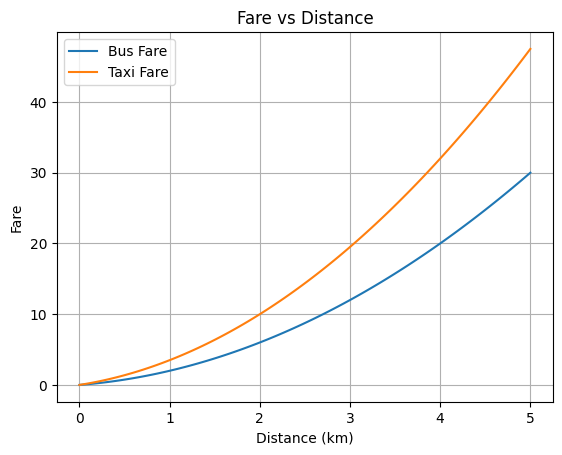

In [12]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 5, 100)
Fb_num = xs**2 + xs
Ft_num = 1.5 * xs**2 + 2 * xs

plt.figure()
plt.plot(xs, Fb_num, label='Bus Fare')
plt.plot(xs, Ft_num, label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()

Problem 02 (c)

Bus is more affordable for budget with passengers on longer routes,while Taxi suits for short distances,time sensitive trips despite higher cost.


Problem 03 (a)

In [19]:
t_sym = sp.symbols('t')
series_terms = - (3/2) * t_sym**2 + (1/4) * t_sym**4 - (1/6) * t_sym**6 + (1/8) * t_sym**8 - (1/10) * t_sym**10 + (1/12) * t_sym**12

P_approx = 5 + 4 * sp.sin(sp.pi * t_sym) + series_terms
print("P(t) approx:", P_approx)

P_np = sp.lambdify(t_sym, P_approx, 'numpy')

P(t) approx: 0.0833333333333333*t**12 - 0.1*t**10 + 0.125*t**8 - 0.166666666666667*t**6 + 0.25*t**4 - 1.5*t**2 + 4*sin(pi*t) + 5


Problem 03 (b)

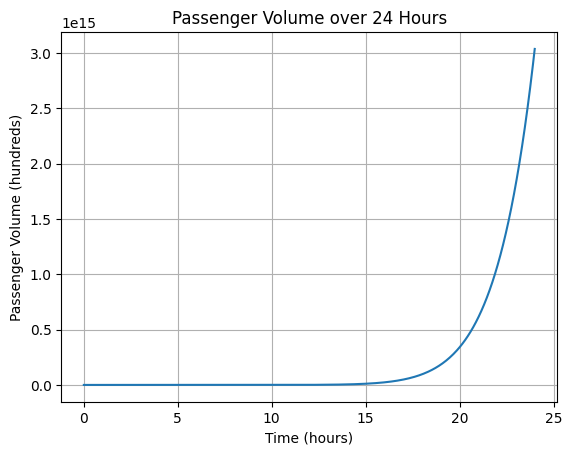

In [14]:
ts = np.linspace(0, 24, 500)
P_vals = P_np(ts)

plt.figure()
plt.plot(ts, P_vals)
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Passenger Volume over 24 Hours')
plt.grid(True)
plt.show()

Problem 04 (a)

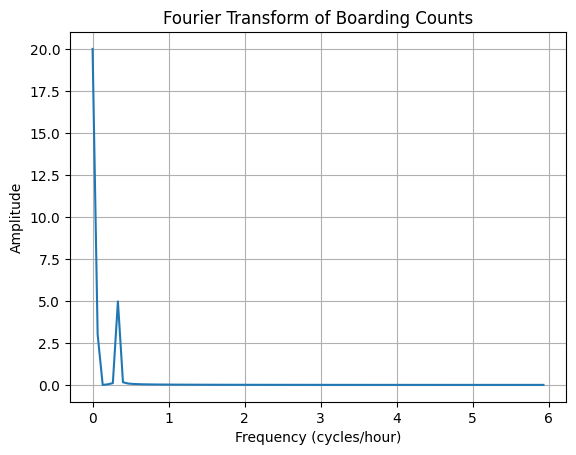

In [20]:
from scipy.fft import fft, fftfreq

# Synthetic data: 5-min intervals from 6AM to 9PM (15 hours = 180 points)
times = np.linspace(0, 15, 180)  # hours
boarding = 10 + 5 * np.sin(2 * np.pi * times / 3) + 3 * np.sin(2 * np.pi * times / 15)  # peaks every 3 and 15 hrs

# FFT
N = len(boarding)
yf = fft(boarding)
xf = fftfreq(N, 5/60)  # freq in per hour (5 min = 1/12 hour)

plt.figure()
plt.plot(xf[:N//2], 2/N * np.abs(yf[:N//2]))
plt.xlabel('Frequency (cycles/hour)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Boarding Counts')
plt.grid(True)
plt.show()

Problem 04 (b)

Problem 04 (c)

Problem 05 (a)

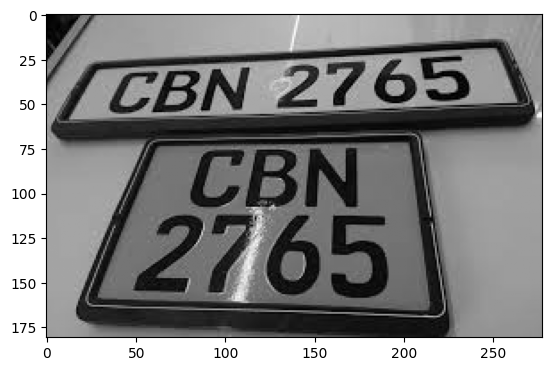

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/ehicle_plate.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

Problem 05 (b)

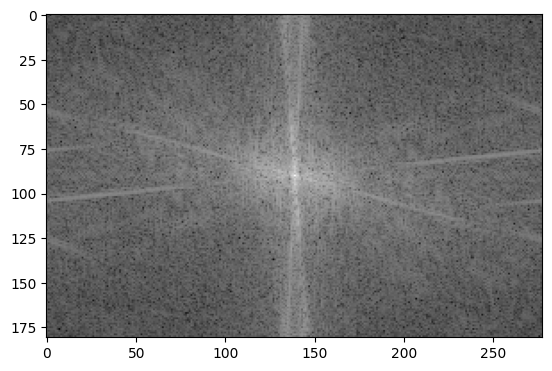

In [24]:
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude = 20*np.log(np.abs(fshift))
plt.imshow(magnitude, cmap='gray')
plt.show()

Problem 05 (c)

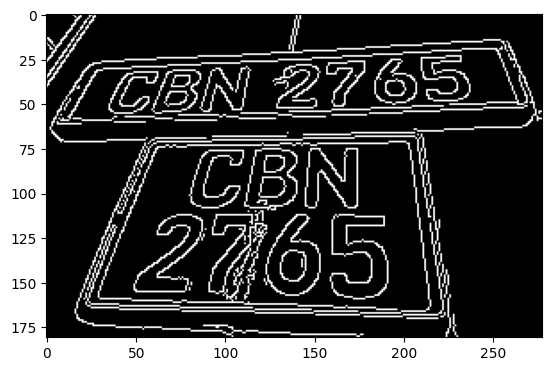

In [25]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.show()